In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [80]:
df = pd.read_csv("data/all_energy_statistics.csv")

In [81]:
SING = df[df.country_or_area.isin(["Singapore"])].sort_values('year')
INDO = df[df.country_or_area.isin(["Indonesia"])].sort_values('year')
MALAY = df[df.country_or_area.isin(["Malaysia"])].sort_values('year')
VIET = df[df.country_or_area.isin(["Viet Nam"])].sort_values('year')
BRUN = df[df.country_or_area.isin(["Brunei Darussalam"])].sort_values('year')
THAI = df[df.country_or_area.isin(["Thailand"])].sort_values('year')
PHIL = df[df.country_or_area.isin(["Philippines"])].sort_values('year')
CAMB = df[df.country_or_area.isin(["Cambodia"])].sort_values('year')

In [82]:
# Compare Electricity - Final energy consumption per Country

In [83]:
SING_CONS = SING[SING.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
INDO_CONS = INDO[INDO.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
MALAY_CONS = MALAY[MALAY.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
VIET_CONS = VIET[VIET.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
BRUN_CONS = BRUN[BRUN.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
THAI_CONS = THAI[THAI.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
PHIL_CONS = PHIL[PHIL.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")
CAMB_CONS = CAMB[CAMB.commodity_transaction == "Electricity - Final energy consumption"].sort_values("year")

In [84]:
min(SING_CONS["year"])
min(INDO_CONS["year"])
min(MALAY_CONS["year"])
min(VIET_CONS["year"])
min(BRUN_CONS["year"])
min(THAI_CONS["year"])
min(PHIL_CONS["year"])
min(CAMB_CONS["year"])

#All Dataframes do have data since 1990

1990

In [85]:
countries = df.country_or_area.unique()
#countries

In [57]:
#Drop unnecessary columns

SING_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)
INDO_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)
MALAY_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)
VIET_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)

KeyError: "['quantity_footnotes' 'category'] not found in axis"

In [86]:
BRUN_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)
THAI_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)
PHIL_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)
CAMB_CONS.drop(["quantity_footnotes", "category"], axis = 1, inplace = True)

In [127]:
ASEAN_CONS = pd.merge(SING_CONS, INDO_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area_x": "Singapore", "country_or_area_y": "Indonesia", "quantity_x": "Singapore_Consumption", "quantity_y": "Indonesia_Consumption"})
ASEAN_CONS.drop(["commodity_transaction_x", "unit_x", "commodity_transaction_y", "unit_y" ], axis = 1, inplace = True)
ASEAN_CONS = pd.merge(ASEAN_CONS, MALAY_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area": "Malaysia", "quantity": "Malaysia_Consumption"})
ASEAN_CONS.drop(["commodity_transaction", "unit" ], axis = 1, inplace = True)
ASEAN_CONS = pd.merge(ASEAN_CONS, VIET_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area": "Vietnam", "quantity": "Vietnam_Consumption"})
ASEAN_CONS.drop(["commodity_transaction", "unit" ], axis = 1, inplace = True)
ASEAN_CONS = pd.merge(ASEAN_CONS, BRUN_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area": "Brunei", "quantity": "Brunei_Consumption"})
ASEAN_CONS.drop(["commodity_transaction", "unit" ], axis = 1, inplace = True)
ASEAN_CONS = pd.merge(ASEAN_CONS, THAI_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area": "Thailand", "quantity": "Thailand_Consumption"})
ASEAN_CONS.drop(["commodity_transaction", "unit" ], axis = 1, inplace = True)
ASEAN_CONS = pd.merge(ASEAN_CONS, PHIL_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area": "Philippines", "quantity": "Philippines_Consumption"})
ASEAN_CONS.drop(["commodity_transaction", "unit" ], axis = 1, inplace = True)
ASEAN_CONS = pd.merge(ASEAN_CONS, CAMB_CONS, on = "year", how = "outer")
ASEAN_CONS = ASEAN_CONS.rename(columns = {"country_or_area": "Cambodia", "quantity": "Cambodia_Consumption"})
#ASEAN_CONS.drop(["commodity_transaction", "unit" ], axis = 1, inplace = True)

In [128]:
ASEAN_CONS["Total_Consumption_ASEAN"] = ASEAN_CONS["Singapore_Consumption"] + ASEAN_CONS["Indonesia_Consumption"] + ASEAN_CONS["Malaysia_Consumption"] + ASEAN_CONS["Thailand_Consumption"] + ASEAN_CONS["Vietnam_Consumption"] + ASEAN_CONS["Brunei_Consumption"] + ASEAN_CONS["Philippines_Consumption"] + ASEAN_CONS["Cambodia_Consumption"]

In [121]:
ASEAN_CONS.columns

Index(['Singapore', 'year', 'Singapore_Consumption', 'quantity_footnotes_x',
       'category_x', 'Indonesia', 'Indonesia_Consumption',
       'quantity_footnotes_y', 'category_y', 'Malaysia',
       'Malaysia_Consumption', 'quantity_footnotes_x', 'category_x', 'Vietnam',
       'Vietnam_Consumption', 'quantity_footnotes_y', 'category_y', 'Brunei',
       'Brunei_Consumption', 'Thailand', 'Thailand_Consumption', 'Philippines',
       'Philippines_Consumption', 'Cambodia', 'commodity_transaction', 'unit',
       'Cambodia_Consumption', 'Total_Consumption_ASEAN'],
      dtype='object')

In [99]:
y1 = ASEAN_CONS.Singapore_Consumption
y2 = ASEAN_CONS.Indonesia_Consumption
y3 = ASEAN_CONS.Malaysia_Consumption
y4 = ASEAN_CONS.Vietnam_Consumption
y5 = ASEAN_CONS.Brunei_Consumption
y6 = ASEAN_CONS.Thailand_Consumption
y7 = ASEAN_CONS.Philippines_Consumption
y8 = ASEAN_CONS.Cambodia_Consumption
y9 = ASEAN_CONS.Total_Consumption_ASEAN
x1 = ASEAN_CONS.year


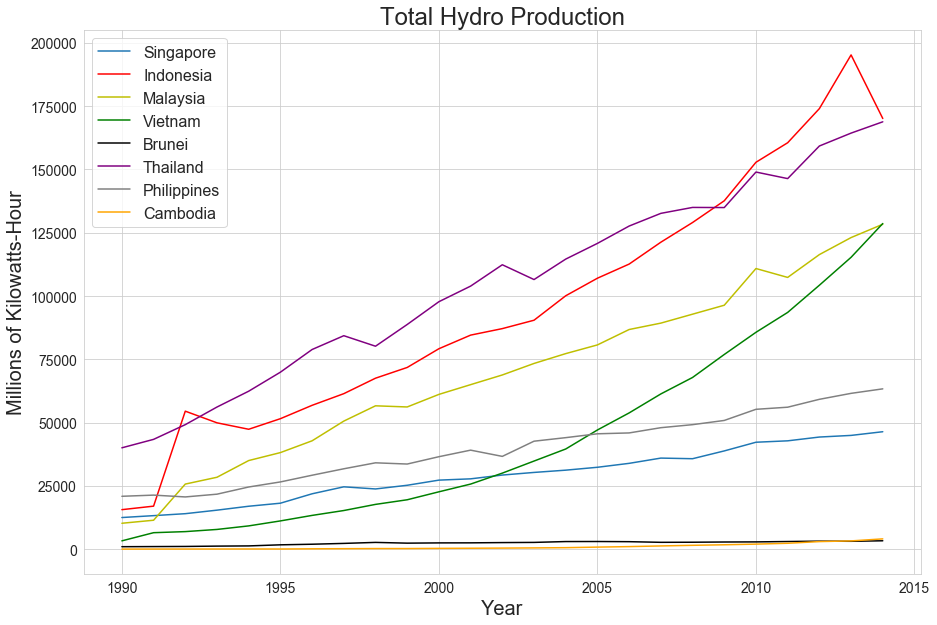

In [97]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="Singapore")
plt.plot(x1,y2,'r',label="Indonesia")
plt.plot(x1,y3,'y',label="Malaysia")
plt.plot(x1,y4,'green',label="Vietnam")
plt.plot(x1,y5,'black',label="Brunei")
plt.plot(x1,y6,'purple',label="Thailand")
plt.plot(x1,y7,'grey',label="Philippines")
plt.plot(x1,y8,'orange',label="Cambodia")


plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Electricity Consumption per Country',fontsize=24)
plt.show()

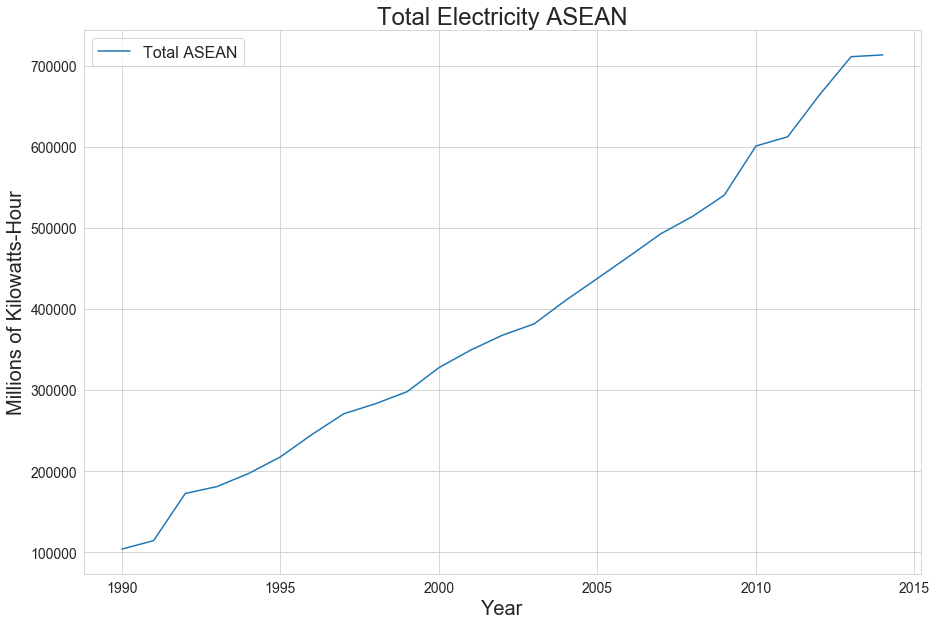

In [100]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y9,label="Total ASEAN")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Electricity ASEAN',fontsize=24)
plt.show()

In [165]:
ASEAN_CONS_percentage = ASEAN_CONS.copy()

In [166]:
ASEAN_CONS_percentage.drop(['Singapore', 'Singapore_Consumption', 'quantity_footnotes_x',
       'category_x', 'Indonesia', 'Indonesia_Consumption',
       'quantity_footnotes_y', 'category_y', 'Malaysia',
       'Malaysia_Consumption', 'quantity_footnotes_x', 'category_x', 'Vietnam',
       'Vietnam_Consumption', 'quantity_footnotes_y', 'category_y', 'Brunei',
       'Brunei_Consumption', 'Thailand', 'Thailand_Consumption', 'Philippines',
       'Philippines_Consumption', 'Cambodia', 'commodity_transaction',
       'Cambodia_Consumption'], axis = 1, inplace = True)

In [167]:
ASEAN_CONS_percentage["Singapore_%"] = round((ASEAN_CONS.Singapore_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Indonesia_%"] = round((ASEAN_CONS.Indonesia_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Malaysia_%"] = round((ASEAN_CONS.Malaysia_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Vietnam_%"] = round((ASEAN_CONS.Vietnam_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Brunei_%"] = round((ASEAN_CONS.Brunei_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Thailand_%"] = round((ASEAN_CONS.Thailand_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Philippines_%"] = round((ASEAN_CONS.Philippines_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)
ASEAN_CONS_percentage["Cambodia_%"] = round((ASEAN_CONS.Cambodia_Consumption / ASEAN_CONS.Total_Consumption_ASEAN)* 100, 2)

In [168]:
ASEAN_CONS_percentage

,year,unit,Total_Consumption_ASEAN,Singapore_%,Indonesia_%,Malaysia_%,Vietnam_%,Brunei_%,Thailand_%,Philippines_%,Cambodia_%
0,1990,"Kilowatt-hours, million",103849.0000,12.07,15.06,9.89,3.20,0.98,38.58,20.15,0.07
1,1991,"Kilowatt-hours, million",114272.0000,11.62,14.90,10.04,5.73,0.94,37.98,18.71,0.08
2,1992,"Kilowatt-hours, million",172398.0000,8.15,31.63,14.93,4.05,0.65,28.54,11.99,0.06
3,1993,"Kilowatt-hours, million",180931.0000,8.54,27.60,15.72,4.33,0.69,31.04,12.03,0.06
4,1994,"Kilowatt-hours, million",197104.0000,8.62,24.04,17.77,4.68,0.67,31.67,12.48,0.06
5,1995,"Kilowatt-hours, million",217510.0000,8.36,23.71,17.55,5.15,0.81,32.15,12.23,0.05
6,1996,"Kilowatt-hours, million",245250.0000,8.93,23.18,17.46,5.45,0.81,32.16,11.92,0.08
7,1997,"Kilowatt-hours, million",270678.0000,9.11,22.70,18.70,5.65,0.86,31.15,11.74,0.09
8,1998,"Kilowatt-hours, million",283059.0000,8.41,23.86,20.01,6.26,0.96,28.33,12.06,0.10
9,1999,"Kilowatt-hours, million",297930.8000,8.48,24.10,18.86,6.56,0.81,29.79,11.30,0.10


In [169]:
p1 = ASEAN_CONS_percentage["Singapore_%"]
p2 = ASEAN_CONS_percentage["Indonesia_%"]
p3 = ASEAN_CONS_percentage["Malaysia_%"]
p4 = ASEAN_CONS_percentage["Vietnam_%"]
p5 = ASEAN_CONS_percentage["Brunei_%"]
p6 = ASEAN_CONS_percentage["Thailand_%"]
p7 = ASEAN_CONS_percentage["Philippines_%"]
p8 = ASEAN_CONS_percentage["Cambodia_%"]
p_years = ASEAN_CONS_percentage["year"]

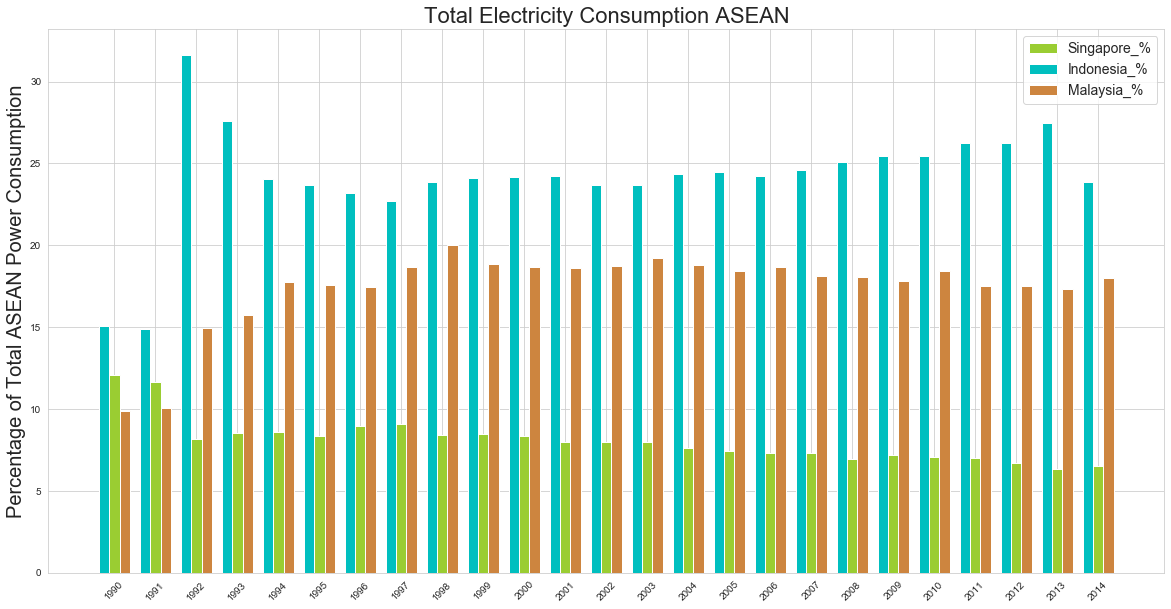

In [170]:
width = 0.25       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(p_years, p1, width, color='yellowgreen')
rects2 = ax.bar(p_years + width -.5, p2, width, color='c')
rects3 = ax.bar(p_years + width, p3, width, color='peru')

ax.set_ylabel("Percentage of Total ASEAN Power Consumption", fontsize=20)
ax.set_title("Total Electricity Consumption ASEAN",fontsize=22)
ax.set_xticks(p_years)
ax.set_xticklabels(p_years, rotation=45)

ax.legend((rects1[0], rects2[0],rects3[0]), ('Singapore_%', 'Indonesia_%',
                                             'Malaysia_%' ), fontsize=14)

plt.show()

In [ ]:
p1_2014 = ASEAN_CONS_percentage["Singapore_%"](24)
p2 = ASEAN_CONS_percentage["Indonesia_%"]
p3 = ASEAN_CONS_percentage["Malaysia_%"]
p4 = ASEAN_CONS_percentage["Vietnam_%"]
p5 = ASEAN_CONS_percentage["Brunei_%"]
p6 = ASEAN_CONS_percentage["Thailand_%"]
p7 = ASEAN_CONS_percentage["Philippines_%"]
p8 = ASEAN_CONS_percentage["Cambodia_%"]
p_years = ASEAN_CONS_percentage["year"]

In [188]:
ASEAN_1990 = ASEAN_CONS_percentage[ASEAN_CONS_percentage["year"] == 1990]
ASEAN_2014 = ASEAN_CONS_percentage[ASEAN_CONS_percentage["year"] == 2014]


In [177]:
ASEAN_1990_2014 = ASEAN_1990.append(ASEAN_2014)

In [178]:
ASEAN_1990_2014

,year,unit,Total_Consumption_ASEAN,Singapore_%,Indonesia_%,Malaysia_%,Vietnam_%,Brunei_%,Thailand_%,Philippines_%,Cambodia_%
0,1990,"Kilowatt-hours, million",103849.000,12.07,15.06,9.89,3.20,0.98,38.58,20.15,0.07
24,2014,"Kilowatt-hours, million",713060.594,6.51,23.85,18.00,18.04,0.47,23.67,8.88,0.58


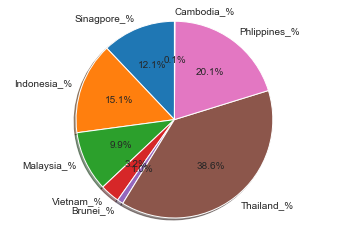

In [239]:
labels = 'Sinagpore_%', 'Indonesia_%', 'Malaysia_%', 'Vietnam_%', "Brunei_%", "Thailand_%", "Phlippines_%", "Cambodia_%"
p1_1990 = ASEAN_1990["Singapore_%"][0]
p2_1990 = ASEAN_1990["Indonesia_%"][0]
p3_1990 = ASEAN_1990["Malaysia_%"][0]
p4_1990 = ASEAN_1990["Vietnam_%"][0]
p5_1990 = ASEAN_1990["Brunei_%"][0]
p6_1990 = ASEAN_1990["Thailand_%"][0]
p7_1990 = ASEAN_1990["Philippines_%"][0]
p8_1990 = ASEAN_1990["Cambodia_%"][0]
sizes = [p1_1990, p2_1990, p3_1990, p4_1990, p5_1990, p6_1990, p7_1990, p8_1990]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [233]:
ASEAN_2014.set_index = 0

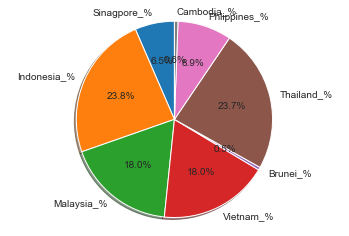

In [238]:
labels = 'Sinagpore_%', 'Indonesia_%', 'Malaysia_%', 'Vietnam_%', "Brunei_%", "Thailand_%", "Phlippines_%", "Cambodia_%"
p1_2014 = ASEAN_2014["Singapore_%"][24]
p2_2014 = ASEAN_2014["Indonesia_%"][24]
p3_2014 = ASEAN_2014["Malaysia_%"][24]
p4_2014 = ASEAN_2014["Vietnam_%"][24]
p5_2014 = ASEAN_2014["Brunei_%"][24]
p6_2014 = ASEAN_2014["Thailand_%"][24]
p7_2014 = ASEAN_2014["Philippines_%"][24]
p8_2014 = ASEAN_2014["Cambodia_%"][24]

sizes = [p1_2014, p2_2014, p3_2014, p4_2014, p5_2014, p6_2014, p7_2014, p8_2014]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [237]:
ASEAN_2014["Singapore_%"][24]


6.51

pandas.core.series.Series

pandas.core.series.Series